# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from sklearn.linear_model import LinearRegression
# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

## Perform API Calls

In [3]:
town = []
cloud = []
country = []
lat = []
long = []
maxtemp = []
windspeed = []
humidity = []
date = []

# set initial count quantities for organization
count = 0
real = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        if count > 48:
            count = 1
            real += 1
            town.append(city)
        else:
            count += 1
            town.append(city)
        print(f"Processing Record {count} of Set {real} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
Processing Record 1 of Set 1 | saldanha
City not found. Skipping...
Processing Record 2 of Set 1 | mys shmidta
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | alugan
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | bayangol
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | rawdon
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | guerrero negro
Processing Record 19 of Set 1 | keti bandar
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | noshiro
Processing Record 23 of Set 1 | barrow
City not 

Processing Record 36 of Set 4 | belmonte
City not found. Skipping...
Processing Record 37 of Set 4 | buala
Processing Record 38 of Set 4 | vao
Processing Record 39 of Set 4 | antsohihy
Processing Record 40 of Set 4 | ashland
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | citluk
City not found. Skipping...
Processing Record 43 of Set 4 | bilibino
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | mudon
Processing Record 46 of Set 4 | lorengau
City not found. Skipping...
City not found. Skipping...
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | lafia
Processing Record 49 of Set 4 | kaabong
Processing Record 1 of Set 5 | college
Processing Record 2 of Set 5 | dmitriyevka
Processing Record 3 of Set 5 | victor harbor
Processing Record 4 of Set 5 | castro
City not found. Skipping...
Processing Record 5 of Set 5 | talara
Processing Record 6 of Set 5 | kaeo
Processing Record 7 of Set 5 | itarema
Processing Record 8 of Set

Processing Record 18 of Set 8 | capljina
Processing Record 19 of Set 8 | wanning
Processing Record 20 of Set 8 | saint-joseph
Processing Record 21 of Set 8 | fez
Processing Record 22 of Set 8 | yeppoon
City not found. Skipping...
Processing Record 23 of Set 8 | kuusamo
Processing Record 24 of Set 8 | mkushi
Processing Record 25 of Set 8 | abu dhabi
Processing Record 26 of Set 8 | nouakchott
Processing Record 27 of Set 8 | tura
Processing Record 28 of Set 8 | hofn
City not found. Skipping...
Processing Record 29 of Set 8 | arlit
Processing Record 30 of Set 8 | plettenberg bay
Processing Record 31 of Set 8 | samarai
City not found. Skipping...
Processing Record 32 of Set 8 | fundao
Processing Record 33 of Set 8 | priladozhskiy
Processing Record 34 of Set 8 | caapucu
Processing Record 35 of Set 8 | lisakovsk
Processing Record 36 of Set 8 | colares
Processing Record 37 of Set 8 | matara
City not found. Skipping...
Processing Record 38 of Set 8 | chapada dos guimaraes
Processing Record 39 o

In [4]:
weatherdf = pd.DataFrame({"City":town, "Cloudiness":cloud, "Country":country, "Date":date,
                            "Humidity":humidity, "Lat":lat, "Long":long, "Max Temp":maxtemp,
                            "Wind Speed":windspeed})
# Export the City_Data into a csv
weatherdf.to_csv(output_data_file)
# Show Record Count
weatherdf.count()

City          508
Cloudiness    508
Country       508
Date          508
Humidity      508
Lat           508
Long          508
Max Temp      508
Wind Speed    508
dtype: int64

In [5]:
# Display the City Data Frame
weatherdf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,saldanha,0,PT,1570626065,39,41.42,-6.55,67.73,2.57
1,mys shmidta,100,RU,1570626065,80,62.06,48.62,35.15,7.90
2,katsuura,20,JP,1570626065,63,33.93,134.50,62.60,5.82
3,alugan,100,PH,1570626066,90,12.22,125.48,77.63,3.00
4,ushuaia,40,AR,1570626066,87,-54.81,-68.31,37.40,28.86


## Latitude vs. Temperature Plot

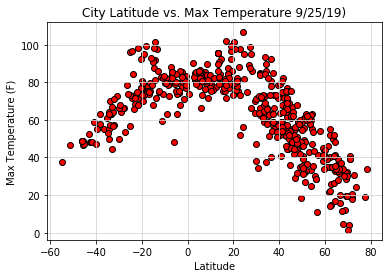

In [6]:
plt.scatter(weatherdf["Lat"],weatherdf["Max Temp"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Max Temperature 9/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

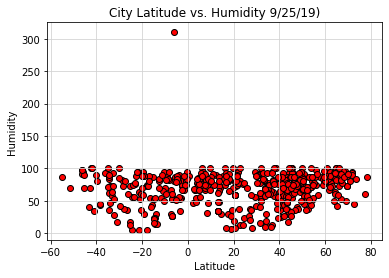

In [7]:
plt.scatter(weatherdf["Lat"],weatherdf["Humidity"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Humidity 9/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

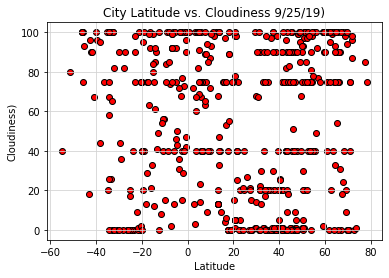

In [8]:
plt.scatter(weatherdf["Lat"],weatherdf["Cloudiness"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Cloudiness 9/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

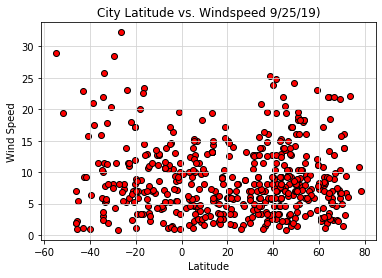

In [12]:
plt.scatter(weatherdf["Lat"],weatherdf["Wind Speed"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Windspeed 9/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern = weatherdf[weatherdf['Lat']>0]
southern = weatherdf[weatherdf['Lat']<0]


The r-squared is: 0.7111608417434949
The line equation is y = 0.72x + 86.89


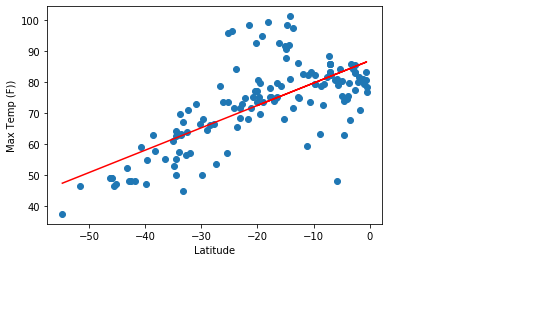

In [23]:
# Create a function to create Linear Regression plots
from scipy.stats import linregress
# Run regresson on southern hemisphere
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F))')
print(f"The r-squared is: {rvalue}")
print(f"The line equation is {line_eq}")
plt.show()

###  Max Temp vs. Latitude Linear Regression

The r-squared is: -0.834651516985606
The line equation is y = -0.94x + 96.44


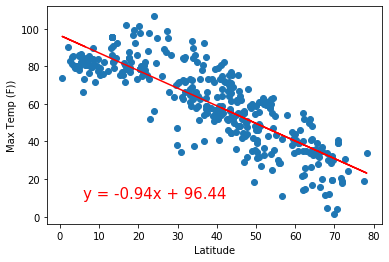

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F))')
print(f"The r-squared is: {rvalue}")
print(f"The line equation is {line_eq}")
plt.show()

The r-squared is: 0.7111608417434949
The line equation is y = 0.72x + 86.89


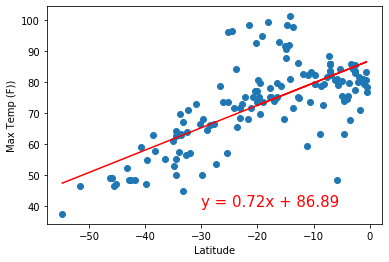

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F))')
print(f"The r-squared is: {rvalue}")
print(f"The line equation is {line_eq}")
plt.show()

The high r value indicates a strong positive correlation between latitude and max temperature.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1898599231461793
The line equation is y = 0.21x + 61.39


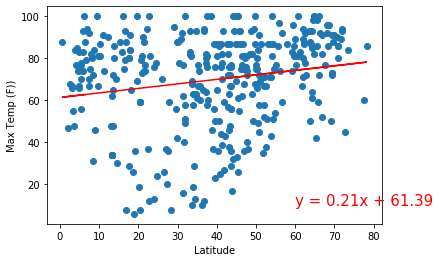

In [39]:
# Northern Hemisphere
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F))')
print(f"The r-squared is: {rvalue}")
print(f"The line equation is {line_eq}")
plt.show()

The r-squared is: -0.015159479636596408
The line equation is y = -0.04x + 65.73


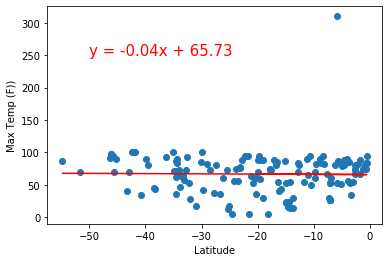

In [38]:
# Southern Hemisphere
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,250),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F))')
print(f"The r-squared is: {rvalue}")
print(f"The line equation is {line_eq}")
plt.show()

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11797519540676375
The line equation is y = 0.24x + 42.52


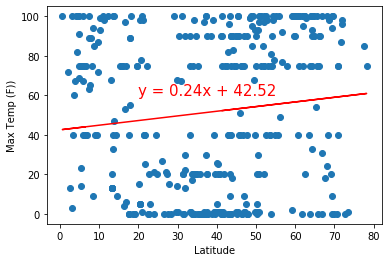

In [37]:
# Northern Hemisphere
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F))')
print(f"The r-squared is: {rvalue}")
print(f"The line equation is {line_eq}")
plt.show()

The r-squared is: -0.0004658370492336005
The line equation is y = -0.0x + 60.01


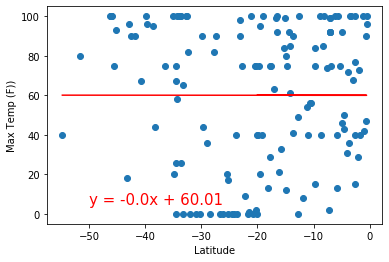

In [36]:
# Southern Hemisphere
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F))')
print(f"The r-squared is: {rvalue}")
print(f"The line equation is {line_eq}")
plt.show()

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11133265906900136
The line equation is y = 0.03x + 7.41


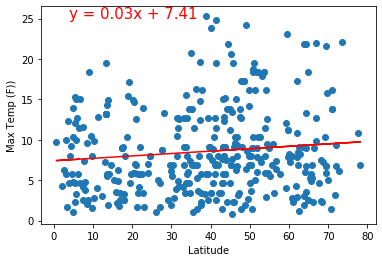

In [35]:
# Northern Hemisphere
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F))')
print(f"The r-squared is: {rvalue}")
print(f"The line equation is {line_eq}")
plt.show()

The r-squared is: -0.13107545641877616
The line equation is y = -0.06x + 8.17


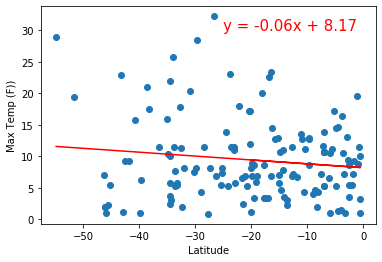

In [34]:
# Southern Hemisphere
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F))')
print(f"The r-squared is: {rvalue}")
print(f"The line equation is {line_eq}")
plt.show()

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.